# Investment Plan For Spark Funds

This notebook illustrates the detailed analysis of the previous investment data to help determine the most appropriate sector and companies where Spark Funds should park their funds. The plan is contingent upon the following pre-conditions:

-> Invest between 5 to 15 million USD per round of investment

-> Invest only in English-speaking countries because of the ease of communication with the companies it would invest in.

<img src="https://www.financialmappers.com.au/wp-content/uploads/2015/10/investments-personal-goals-financial-planning.png", width="200", height="200", align="center" />

We start by importing the pre-requisite libraries and the datasets into pandas dataframes

In [1]:
import numpy as np
import pandas as  pd

companies_df = pd.read_csv("D:/upgrad/assignments/Submission 1/companies.txt", sep=None,engine="python", encoding = "palmos")
# Taking a peak at the dataset
companies_df.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


Taking a look at the funding rounds dataset.

In [2]:
rounds_df = pd.read_csv("D:/upgrad/assignments/Submission 1/rounds2.csv",sep=None,engine="python",encoding = "palmos")

rounds_df.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


Since the case for permalinks do not match for the rounds and company dataset we need to make sure its upper cae for both datasets in order to merge.

In [3]:
rounds_df['company_permalink'] = rounds_df.company_permalink.str.upper()

In [4]:
rounds_df.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


Find number of unique companies in the rounds dataset

In [5]:
rounds_df['company_permalink'].nunique()

66368

In [6]:
# Making sure case of companies dataset's permalink matches the rounds one
companies_df['permalink'] = companies_df.permalink.str.upper()

Number of unique companies in the companies dataset

In [7]:
companies_df['permalink'].nunique()

66368

Taking a peek into the companies dataset with head and info function before merging it with rounds dataframe:

In [8]:
companies_df.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/ORGANIZATION/004-TECHNOLOGIES,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [9]:
companies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


Merging on the permalink column in order to derive results from combined data frame

In [10]:
master_frame = pd.merge(companies_df, rounds_df, how='inner',left_on='permalink',right_on='company_permalink')

In [11]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [12]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
permalink                  114949 non-null object
name                       114948 non-null object
homepage_url               108815 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94428 non-null object
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(15)
memory usage: 14.9+ MB


Finding number of observations in the master_frame

In [13]:
master_frame.company_permalink.count()

114949

Narrowing down the dataframe to the required four funding types: venture, angel, seed, and private equity

In [14]:
cat_frame=master_frame[(master_frame.funding_round_type=='venture') | (master_frame.funding_round_type=='seed') 
                       | (master_frame.funding_round_type=='private_equity') | (master_frame.funding_round_type=='angel') ]

In [15]:
#Importing required plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

Plotting average inestment amount for each of the 4 sectors. It is clear fro the plot that on an average the investment in private eqity is around 70 million dolars.
On the contrary, investment in the venture arena is around 11 million dollars on an average. Thus this catwgory seems like the most appropriate for Spark funds. Lete plot some other metrics to be sure.

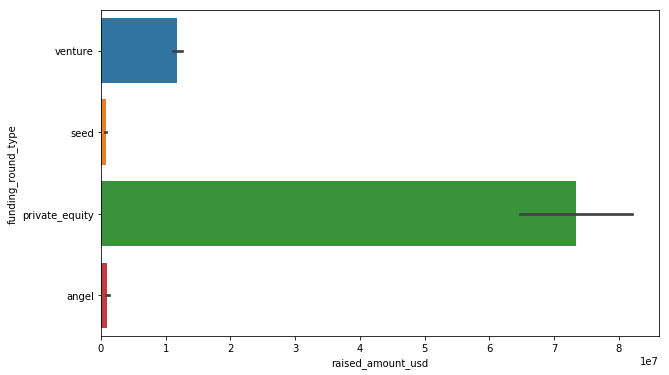

In [16]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='raised_amount_usd', y='funding_round_type', data = cat_frame)

Aggregating the master dataframe by the type of funding.

In [17]:
master_funding = cat_frame.groupby('funding_round_type')
mf_mean_sum = master_funding.agg({'raised_amount_usd':['mean','sum']}).reset_index().rename(columns={'mean':'Avg Investment','sum':'Total Investment'})

Determine what fraction of the total investment does each funding type account for.

In [18]:
mf_mean_sum['Fraction Investment']=round(mf_mean_sum['raised_amount_usd']['Total Investment'] / cat_frame['raised_amount_usd'].sum() ,2)
mf_sorted = mf_mean_sum.sort_values('Fraction Investment', ascending=False)
mf_sorted.head()

funding_round_type raised_amount_usd                  Fraction Investment
                        Avg Investment Total Investment                    
3            venture      1.174895e+07     5.901262e+11                0.78
1     private_equity      7.330859e+07     1.419254e+11                0.19
2               seed      7.198180e+05     1.698986e+10                0.02
0              angel      9.586945e+05     4.659255e+09                0.01

Plotting the __Fraction Of Total Investment__ of each sector as well as the __Average Investment Per Funding Type__ to determine the appropriate funding type for Spark Funds. 
__Plot 1__ for __Checkpoint 6__

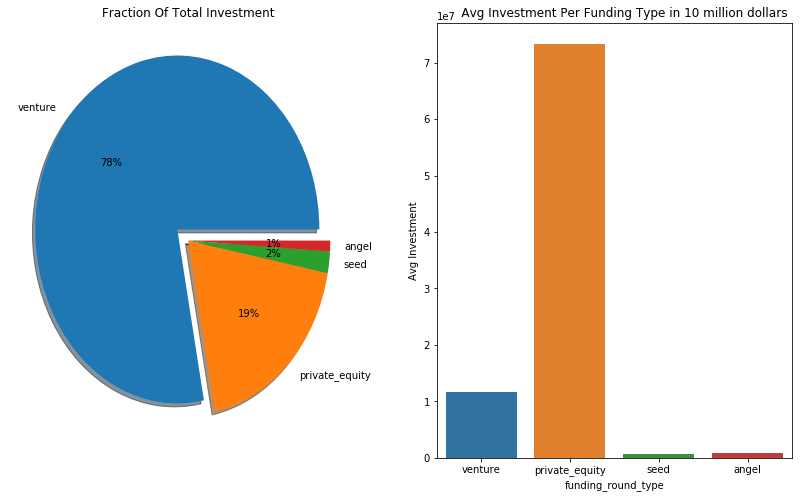

In [19]:
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.title('Fraction Of Total Investment')
explode = (0.1, 0, 0, 0)
plt.pie(mf_sorted['Fraction Investment'], labels=mf_sorted.funding_round_type,explode=explode, autopct='%1.0f%%',shadow=True)
plt.subplot(122)
plt.title('     Avg Investment Per Funding Type in 10 million dollars')
sns.barplot(x='funding_round_type', y=mf_sorted['raised_amount_usd']['Avg Investment'],data=mf_sorted)

On the basis of above analysis it is clear that __Venture__ is the correct funding type for Spark Funds to invest their money in.

Now determining the top 9 countries ehich have maximum investment in the Venture arena 

In [20]:
top9 = cat_frame[(cat_frame.funding_round_type=='venture')].groupby('country_code')['raised_amount_usd'].sum().reset_index()
top9 = top9.sort_values('raised_amount_usd', ascending=False).head(9)
top9

,country_code,raised_amount_usd
100,USA,4.225108e+11
16,CHN,3.983542e+10
31,GBR,2.024563e+10
41,IND,1.439186e+10
13,CAN,9.583332e+09
30,FRA,7.259537e+09
44,ISR,6.907515e+09
23,DEU,6.346960e+09
47,JPN,3.363677e+09


Now Plotting all these countries on a boxplot to visualise the __top 3 English Speaking countries__ where Spark Funds might want to invest their funds. __Plot 2__ of checkpoint 6.

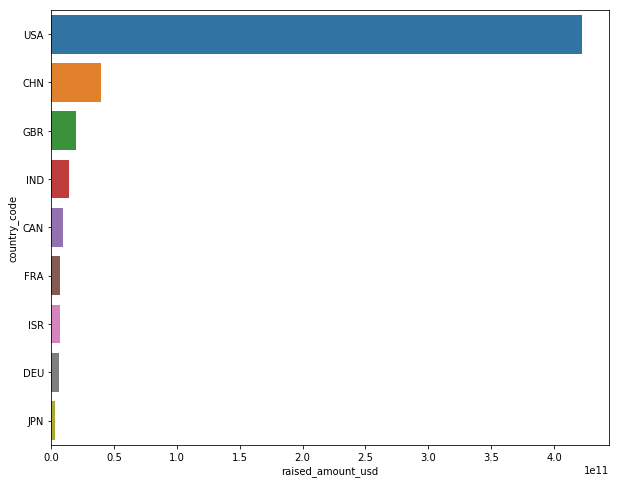

In [21]:
plt.figure(figsize=(10,8))
sns.barplot(data=top9, x='raised_amount_usd',y='country_code')

After juxtaposing above plot with the English Speaking countries data, it is clear that __USA__, __Great Britain__ and __India__ are the three countries where Spark funds should invest their money in order to gain the balance between safety and growth. So filtering out data for these three countries.

In [22]:
top9 = top9[(top9.country_code=='USA') | (top9.country_code=='GBR') | (top9.country_code=='IND')]

In [23]:
top9.head()


,country_code,raised_amount_usd
100,USA,4.225108e+11
31,GBR,2.024563e+10
41,IND,1.439186e+10


Now reading in the mapping data frame and taking a peek at it to determine the __main sector__ corresponding to each category so as to perform further analysis on companies within each __main sector__.

In [24]:
mapping_df = pd.read_csv("D:/upgrad/assignments/Submission 1/mapping.csv",sep=None,engine="python",encoding = "palmos")

In [25]:
mapping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
category_list                              687 non-null object
Automotive & Sports                        688 non-null int64
Blanks                                     688 non-null int64
Cleantech / Semiconductors                 688 non-null int64
Entertainment                              688 non-null int64
Health                                     688 non-null int64
Manufacturing                              688 non-null int64
News, Search and Messaging                 688 non-null int64
Others                                     688 non-null int64
Social, Finance, Analytics, Advertising    688 non-null int64
dtypes: int64(9), object(1)
memory usage: 53.8+ KB


In [26]:
mapping_df.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


Now forming a new filtered out data frame out of the data categorised by funding type.
Filtering out the required countries:

In [27]:
master_pruned = cat_frame[(cat_frame["country_code"]=='USA') | (cat_frame["country_code"]=='GBR') | (cat_frame["country_code"]=='IND')]

Filtering out the funding enteries for the __venture__ funding type:

In [28]:
master_pruned = master_pruned[(master_pruned["funding_round_type"]=='venture')]

In [29]:
master_pruned.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
5,/ORGANIZATION/004-TECHNOLOGIES,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
10,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/ORGANIZATION/0XDATA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0
11,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/ORGANIZATION/0XDATA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0


Now filtering out the null values out of the category list so that the complex category_list values can be converted to their __primary sector__.

In [30]:
master_pruned = master_pruned[~master_pruned.category_list.isnull()]

Now adding the __primary sector__ for the investment made into the dataframe.

In [31]:
master_pruned['primary_sector'] = master_pruned['category_list'].apply(lambda x: x.split('|')[0])

In [32]:
master_pruned.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media
1,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,Application Platforms
5,/ORGANIZATION/004-TECHNOLOGIES,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,Software
10,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/ORGANIZATION/0XDATA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,Analytics
11,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/ORGANIZATION/0XDATA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,Analytics


Now identifying the main sector in the mapping dataset by finding out the column with maximum value i.e. 1 and then taking the name of that column and putting it in new column named __main_sector__.

In [33]:
mapping_df['main_sector'] = mapping_df.loc[:, mapping_df.columns != 'category_list'].idxmax(axis=1)

Now filtering out the mapping data frame to contain the category list and the corresponding main sector.

In [34]:
mapping_df = mapping_df[['category_list','main_sector']]

Joining the master data frame with mapping dta frame so that each investment data point can be mapped to its __main_sector__.

In [35]:
master_mapping_df = pd.merge(master_pruned,mapping_df,how='inner',left_on='primary_sector',right_on='category_list')

In [36]:
master_mapping_df.head()

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,category_list_y,main_sector
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media,Media,Entertainment
1,/ORGANIZATION/90MIN,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/ORGANIZATION/90MIN,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,Media,Media,Entertainment
2,/ORGANIZATION/90MIN,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/ORGANIZATION/90MIN,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,Media,Media,Entertainment
3,/ORGANIZATION/90MIN,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/ORGANIZATION/90MIN,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.0,Media,Media,Entertainment
4,/ORGANIZATION/ALL-DEF-DIGITAL,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/ORGANIZATION/ALL-DEF-DIGITAL,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,Media,Media,Entertainment


Finding the percentage of null or NaN values in each column so as to filter out the records whose raised amount is NaN.

In [37]:
round(100*(master_mapping_df.isnull().sum()/len(master_mapping_df.index)), 2)

permalink                   0.00
name                        0.00
homepage_url                4.71
category_list_x             0.00
status                      0.00
country_code                0.00
state_code                  0.20
region                      0.44
city                        0.44
founded_at                 16.51
company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         46.22
funded_at                   0.00
raised_amount_usd           5.84
primary_sector              0.00
category_list_y             0.00
main_sector                 0.00
dtype: float64

Filter out records with investment amount as NaN.

In [38]:
master_mapping_df = master_mapping_df[~master_mapping_df.raised_amount_usd.isnull()]

Considering only those investments where raised amount was between 5million and 15 million.

In [39]:
master_mapping_df = master_mapping_df[(master_mapping_df.raised_amount_usd >= 5000000) & (master_mapping_df.raised_amount_usd <= 15000000)]

Now forming three data frames D1, D2 and D3 for USA, Great Britain and India respectively that contains the investment data as well as the main and primary sector. Also these dataframes will contain the following data:

-> The number of investments made in each main sector as __sec_invest_count__ and the sector vise investment amount as __sec_invest_amt__.

-> The data frame is sorted by the main sectors on the basis of number of investments that sector has received. That helps to determine the likely main sector Spark Funds is likely to invest in.

In [40]:
D1 = master_mapping_df[master_mapping_df.country_code=='USA']
D1_count_sum = D1.groupby('main_sector').agg({'name':'count', 'raised_amount_usd': 'sum'}).reset_index().rename(columns={'name':'sec_invest_count', 'raised_amount_usd':'sec_invest_amt'})
D1 = pd.merge(D1,D1_count_sum,on='main_sector',how='inner').sort_values(['sec_invest_count'], ascending=False)
D1.head()

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,...,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,category_list_y,main_sector,sec_invest_count,sec_invest_amt
4347,/ORGANIZATION/POWERFILE,PowerFile,http://www.powerfile.com,Web Hosting,operating,USA,CA,SF Bay Area,Foster City,01-01-1996,...,/funding-round/249f2e493ec35a81580ae5515d766187,venture,B,16-01-2006,10000000.0,Web Hosting,Web Hosting,Others,2923,2.608928e+10
3375,/ORGANIZATION/CINCHCAST,Cinchcast,http://cinchcast.com,Enterprise Software|SaaS|Semantic Web|Video St...,operating,USA,NY,New York City,New York,01-01-2006,...,/funding-round/54fd325d5cd559b4c4870890e8d164b9,venture,B,17-08-2011,6000000.0,Enterprise Software,Enterprise Software,Others,2923,2.608928e+10
3382,/ORGANIZATION/CLIQUE-INTELLIGENCE,Clique Intelligence,http://www.cliqueintelligence.com,Enterprise Software,operating,USA,CA,SF Bay Area,Redwood City,01-01-2013,...,/funding-round/065b1de1615ace503051ec5e792baad5,venture,NaN,22-05-2013,5000000.0,Enterprise Software,Enterprise Software,Others,2923,2.608928e+10
3381,/ORGANIZATION/CLEVERSAFE,Cleversafe,http://www.cleversafe.com,Enterprise Software,acquired,USA,IL,Chicago,Chicago,01-01-2004,...,/funding-round/e4b10a85397c2ed7c532fe5645b57caa,venture,NaN,03-06-2009,9010283.0,Enterprise Software,Enterprise Software,Others,2923,2.608928e+10
3380,/ORGANIZATION/CLEVERSAFE,Cleversafe,http://www.cleversafe.com,Enterprise Software,acquired,USA,IL,Chicago,Chicago,01-01-2004,...,/funding-round/283b1d6e87609a15275b375b95d4d2d6,venture,C,11-11-2007,5000000.0,Enterprise Software,Enterprise Software,Others,2923,2.608928e+10


In [41]:
D2 = master_mapping_df[master_mapping_df.country_code=='GBR']
D2_count_sum = D2.groupby('main_sector').agg({'name':'count', 'raised_amount_usd': 'sum'}).reset_index().rename(columns={'name':'sec_invest_count', 'raised_amount_usd':'sec_invest_amt'})
D2 = pd.merge(D2,D2_count_sum,on='main_sector',how='inner').sort_values(['sec_invest_count'], ascending=False)
D2.head()

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,...,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,category_list_y,main_sector,sec_invest_count,sec_invest_amt
268,/ORGANIZATION/YOYO,Yoyo Wallet,http://www.yoyowallet.com,Loyalty Programs|Mobile|Mobile Payments|Retail,operating,GBR,H9,London,London,01-05-2013,...,/funding-round/b18a6d85f32d12ace2366c0b7f85facc,venture,A,15-04-2015,10000000.0,Loyalty Programs,Loyalty Programs,Others,143,1.249124e+09
186,/ORGANIZATION/NEWVOICEMEDIA,NewVoiceMedia,http://www.newvoicemedia.com,Enterprise Software,operating,GBR,F2,London,Basingstoke,01-01-2000,...,/funding-round/1232312258e412f661075b3c0cbc9945,venture,A,28-05-2010,6300000.0,Enterprise Software,Enterprise Software,Others,143,1.249124e+09
172,/ORGANIZATION/BRAINBOW,Peak,http://www.peak.net/,Education|Games,operating,GBR,H9,London,London,01-01-2012,...,/funding-round/e03af44f798194f9f64fdff4cd37c2c6,venture,A,16-04-2015,7000000.0,Education,Education,Others,143,1.249124e+09
173,/ORGANIZATION/FUSE-UNIVERSAL,Fuse Universal,http://www.fuseuniversal.com,Education|Internet|Social Media,operating,GBR,E8,GBR - Other,Shoreditch,01-01-2008,...,/funding-round/22075c2848566d82555d291715522b21,venture,NaN,18-06-2015,10000000.0,Education,Education,Others,143,1.249124e+09
174,/ORGANIZATION/MEDIKIDZ,Medikidz,http://medikidz.com,Education|Medical|Publishing,operating,GBR,H9,London,London,01-01-2009,...,/funding-round/e0f4cb90ef25ab52a10f76d747665510,venture,B,11-05-2014,5055753.0,Education,Education,Others,143,1.249124e+09


In [42]:
D3 = master_mapping_df[master_mapping_df.country_code=='IND']
D3_count_sum = D3.groupby('main_sector').agg({'name':'count', 'raised_amount_usd': 'sum'}).reset_index().rename(columns={'name':'sec_invest_count', 'raised_amount_usd':'sec_invest_amt'})
D3 = pd.merge(D3,D3_count_sum,on='main_sector',how='inner').sort_values(['sec_invest_count'], ascending=False)
D3.head()

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,...,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,category_list_y,main_sector,sec_invest_count,sec_invest_amt
80,/ORGANIZATION/INDIA-PROPERTY-ONLINE,India Property Online,http://indiaproperty.com,E-Commerce,operating,IND,25,Chennai,Chennai,01-01-2012,...,/funding-round/f31e6da2a8798359968c89a3a71845a8,venture,B,19-12-2013,12000000.0,E-Commerce,E-Commerce,Others,109,1.007410e+09
128,/ORGANIZATION/AZURE-HOSPITALITY,Azure Hospitality,http://www.azurehospitality.com/index.html,Hospitality,operating,IND,7,New Delhi,New Delhi,01-01-2009,...,/funding-round/e1391efe0df02c13bb587907c059c081,venture,NaN,13-07-2015,10000000.0,Hospitality,Hospitality,Others,109,1.007410e+09
93,/ORGANIZATION/PEPPERFRY-COM,Pepperfry.com,http://www.pepperfry.com,E-Commerce,operating,IND,16,Mumbai,Mumbai,01-01-2011,...,/funding-round/6b0417be8e2dfc535ef173d7d82272d8,venture,A,12-12-2011,5000000.0,E-Commerce,E-Commerce,Others,109,1.007410e+09
92,/ORGANIZATION/PEPPERFRY-COM,Pepperfry.com,http://www.pepperfry.com,E-Commerce,operating,IND,16,Mumbai,Mumbai,01-01-2011,...,/funding-round/24e78f9986888b14bf100696234f1b7c,venture,B,02-04-2013,8000000.0,E-Commerce,E-Commerce,Others,109,1.007410e+09
91,/ORGANIZATION/PAYMATE-INDIA,PayMate India,http://www.gopaymate.com,E-Commerce|FinTech,operating,IND,16,Mumbai,Mumbai,01-01-2006,...,/funding-round/1fe24fc780c407435162b6be797528e7,venture,A,01-07-2006,5000000.0,E-Commerce,E-Commerce,Others,109,1.007410e+09


Determining count of the Investments in each country(USA, GBR and IND).

In [43]:
D1.count()

permalink                  11149
name                       11149
homepage_url               10605
category_list_x            11149
status                     11149
country_code               11149
state_code                 11147
region                     11140
city                       11140
founded_at                  9561
company_permalink          11149
funding_round_permalink    11149
funding_round_type         11149
funding_round_code          7893
funded_at                  11149
raised_amount_usd          11149
primary_sector             11149
category_list_y            11149
main_sector                11149
sec_invest_count           11149
sec_invest_amt             11149
dtype: int64

In [44]:
D2.count()

permalink                  577
name                       577
homepage_url               550
category_list_x            577
status                     577
country_code               577
state_code                 563
region                     548
city                       548
founded_at                 459
company_permalink          577
funding_round_permalink    577
funding_round_type         577
funding_round_code         355
funded_at                  577
raised_amount_usd          577
primary_sector             577
category_list_y            577
main_sector                577
sec_invest_count           577
sec_invest_amt             577
dtype: int64

In [45]:
D3.count()

permalink                  299
name                       299
homepage_url               297
category_list_x            299
status                     299
country_code               299
state_code                 298
region                     298
city                       298
founded_at                 257
company_permalink          299
funding_round_permalink    299
funding_round_type         299
funding_round_code         211
funded_at                  299
raised_amount_usd          299
primary_sector             299
category_list_y            299
main_sector                299
sec_invest_count           299
sec_invest_amt             299
dtype: int64

Determining the total amount invested in each country.

In [46]:
D1.raised_amount_usd.sum()

99661524549.0

In [47]:
D2.raised_amount_usd.sum()

5028704358.0

In [48]:
D3.raised_amount_usd.sum()

2683537552.0

Constructing a new dataframe specifically for count of investments in each sector in order to determine the top three sectors for most number of investments in all the three countries.

In [49]:
D1_sector_vise = D1.groupby(['main_sector','country_code'])['raised_amount_usd'].count().reset_index(name='count').sort_values(['count'], ascending=False)
D2_sector_vise = D2.groupby(['main_sector','country_code'])['raised_amount_usd'].count().reset_index(name='count').sort_values(['count'], ascending=False)
D3_sector_vise = D3.groupby(['main_sector','country_code'])['raised_amount_usd'].count().reset_index(name='count').sort_values(['count'], ascending=False)

Now concating the three data frames so as to form the plot of top three sectors investment count vise for each country.

In [50]:
D1_D2_D3_sec = pd.concat([D1_sector_vise.head(3),D2_sector_vise.head(3),D3_sector_vise.head(3)],axis=0)
D1_D2_D3_sec

,main_sector,country_code,count
6,Others,USA,2923
1,Cleantech / Semiconductors,USA,2297
7,"Social, Finance, Analytics, Advertising",USA,1912
6,Others,GBR,143
1,Cleantech / Semiconductors,GBR,127
7,"Social, Finance, Analytics, Advertising",GBR,98
6,Others,IND,109
5,"News, Search and Messaging",IND,52
2,Entertainment,IND,33


Plot representing top three sectors investment count vise in each country. Plot 3 of __checkpoint 6__.

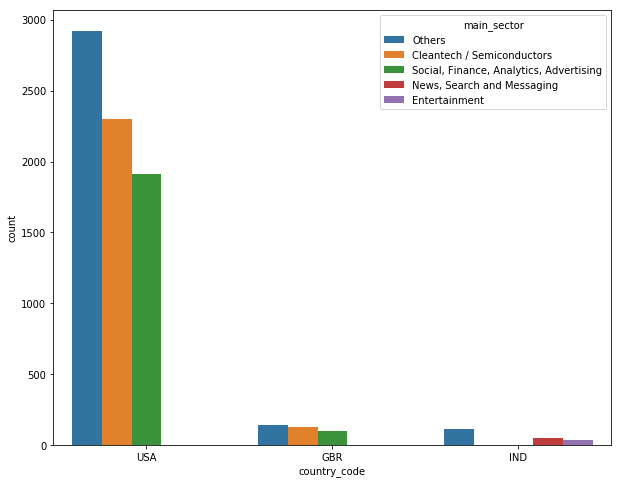

In [51]:
plt.figure(figsize=(10,8))
bp = sns.barplot(x='country_code', y='count', hue='main_sector', data=D1_D2_D3_sec)

Now since we know about the top three sectors in each country, now we need to determine the companies where Spark funds can invest in order to mximise their profits. For this we will try to find the companies in each sector that has received the __highest cumulative investment__. If that company is still in __operating state__ then that should be a safe bet for Spark funds.

Now retrieving the companies that received most amount of __venture__ funding in the top sectors in their respective countries.

-> Retreiving the company that has most amount of cumulative investment in the category __Others__ for __USA__.

In [52]:
D1_first = D1[(D1.main_sector=='Others') & ((D1.status=='acquired') | (D1.status=='operating')) ].reset_index().groupby(['permalink','name','main_sector','country_code']).agg({'raised_amount_usd': 'sum'}).reset_index().rename(columns={'raised_amount_usd':'total_invest_amt'}).sort_values(['total_invest_amt'], ascending=False).head(1)
D1_first

,permalink,name,main_sector,country_code,total_invest_amt
1733,/ORGANIZATION/VIRTUSTREAM,Virtustream,Others,USA,64300000.0


-> Retreiving the company that has most amount of cumulative investment in the category __Others__ for __Great Britain__.

In [53]:
D2_first = D2[ (D2.main_sector=='Others') & ((D2.status=='acquired') | (D2.status=='operating')) ].reset_index().groupby(['permalink','name','main_sector','country_code']).agg({'raised_amount_usd': 'sum'}).reset_index().rename(columns={'raised_amount_usd':'total_invest_amt'}).sort_values(['total_invest_amt'], ascending=False).head(1)
D2_first

,permalink,name,main_sector,country_code,total_invest_amt
33,/ORGANIZATION/ELECTRIC-CLOUD,Electric Cloud,Others,GBR,37000000.0


-> Retreiving the company that has most amount of cumulative investment in the category __Others__ for __India__.

In [54]:
D3_first = D3[ (D3.main_sector=='Others') & ((D3.status=='acquired') | (D3.status=='operating')) ].reset_index().groupby(['permalink','name','main_sector','country_code']).agg({'raised_amount_usd': 'sum'}).reset_index().rename(columns={'raised_amount_usd':'total_invest_amt'}).sort_values(['total_invest_amt'], ascending=False).head(1)
D3_first

,permalink,name,main_sector,country_code,total_invest_amt
23,/ORGANIZATION/FIRSTCRY-COM,FirstCry.com,Others,IND,39000000.0


Now retrieving the companies that received most amount of __venture__ funding in the __second most invested sector__ in terms of count in their respective countries.

-> Retreiving the company that has most amount of cumulative investment in the category __Cleantech / Semiconductors__ for __USA__.

In [55]:
D1_second = D1[ (D1.main_sector=='Cleantech / Semiconductors') & ((D1.status=='acquired') | (D1.status=='operating'))].reset_index().groupby(['permalink','name','main_sector','country_code']).agg({'raised_amount_usd': 'sum'}).reset_index().rename(columns={'raised_amount_usd':'total_invest_amt'}).sort_values(['total_invest_amt'], ascending=False).head(1)
D1_second

,permalink,name,main_sector,country_code,total_invest_amt
187,/ORGANIZATION/BIODESIX,Biodesix,Cleantech / Semiconductors,USA,75300000.0


-> Retreiving the company that has most amount of cumulative investment in the category __Cleantech / Semiconductors__ for __Great Britain__.

In [56]:
D2_second = D2[ (D2.main_sector=='Cleantech / Semiconductors') & ((D2.status=='acquired') | (D2.status=='operating'))].reset_index().groupby(['permalink','name','main_sector','country_code']).agg({'raised_amount_usd': 'sum'}).reset_index().rename(columns={'raised_amount_usd':'total_invest_amt'}).sort_values(['total_invest_amt'], ascending=False).head(1)
D2_second

,permalink,name,main_sector,country_code,total_invest_amt
26,/ORGANIZATION/EUSA-PHARMA,EUSA Pharma,Cleantech / Semiconductors,GBR,35600000.0


-> Retreiving the company that has most amount of cumulative investment in the category __News, Search and Messaging__ for __India__.

In [57]:
D3_second = D3[ (D3.main_sector=='News, Search and Messaging') & ((D3.status=='acquired') | (D3.status=='operating')) ].reset_index().groupby(['permalink','name','main_sector','country_code']).agg({'raised_amount_usd': 'sum'}).reset_index().rename(columns={'raised_amount_usd':'total_invest_amt'}).sort_values(['total_invest_amt'], ascending=False).head(1)
D3_second

,permalink,name,main_sector,country_code,total_invest_amt
9,/ORGANIZATION/GUPSHUP-TECHNOLOGY-INDIA-PVT-LTD,GupShup,"News, Search and Messaging",IND,33000000.0


Now plotting the best companies to invest in each country for their dominant sectors.

In [58]:
Country_Company = pd.concat([D1_first,D1_second,D2_first,D2_second,D3_first,D3_second])
Country_Company

,permalink,name,main_sector,country_code,total_invest_amt
1733,/ORGANIZATION/VIRTUSTREAM,Virtustream,Others,USA,64300000.0
187,/ORGANIZATION/BIODESIX,Biodesix,Cleantech / Semiconductors,USA,75300000.0
33,/ORGANIZATION/ELECTRIC-CLOUD,Electric Cloud,Others,GBR,37000000.0
26,/ORGANIZATION/EUSA-PHARMA,EUSA Pharma,Cleantech / Semiconductors,GBR,35600000.0
23,/ORGANIZATION/FIRSTCRY-COM,FirstCry.com,Others,IND,39000000.0
9,/ORGANIZATION/GUPSHUP-TECHNOLOGY-INDIA-PVT-LTD,GupShup,"News, Search and Messaging",IND,33000000.0


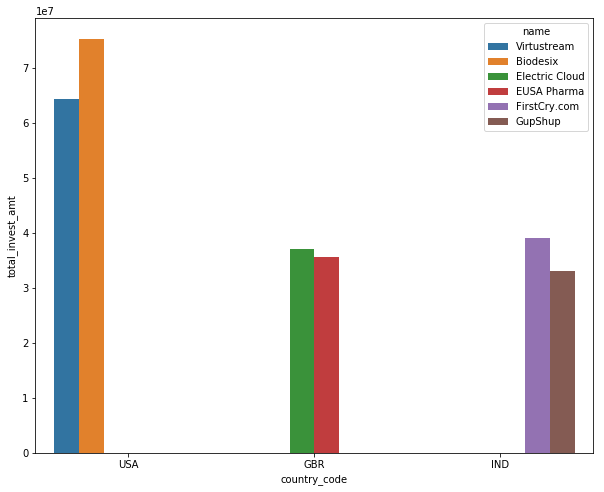

In [59]:
plt.figure(figsize=(10,8))
sns.barplot(data=Country_Company, x="country_code", y='total_invest_amt', hue='name')
plt.show()

So in conclusion the most effective investment strategy for Spark Funds would be to __diversify the investment__ in each of the sectors for every round of investment. This doesen't only provide the best chance of __growth__ but also makes their funds __risk averse__. One instance of such investment strategy would be the following:

Total Fund To Be Allocated: 15 million USD

Now a good strategy would be to devide the fund __equally__ among all the three countries because that would mean that a negative trend in the __macroeconomic atmosphere__ of a country doesen't impact the investment to a great extent.

Total Fund to Be Allocated to each country: 5 million USD

Now furthermore, the next logical step would be to allocate the 5 million USD in each country equally among the __top 2 sectors__ of the country. Choosing the __most invested companies__ in these sectors respectively would lead to a fund allocation like this:

USA -

       Virtustream - 2.5 million USD
       Biodesix - 2.5 million USD
       
Great Britain - 
       
       Electric Cloud - 2.5 million USD  
       EUSA Pharma - 2.5 million USD

India - 
       
       FirstCry.com - 2.5 million USD
       GupShup - 2.5 million USD